<a href="https://colab.research.google.com/github/dige04/MaSSP/blob/main/%C4%90inh_Th%C3%A0nh_Hi%E1%BA%BFu_MaSSP_DS_2023_%7C_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1

```
MaSSP DS 2023 | Deadline 23h59 02/08/2023
Name: Đinh Thành Hiếu
```

**Note:**
- You can create a new cell, using sub-functions, or create new variables to solve every question.
- If there are any questions that you find very hard to solve, please learn how to do them on the Internet of Mentors.
- You have to use Pytorch to solve every question.
- You should run all codes before submitting.
- **If you have done this assignment on your local computer, please upload it to Google Colab before submitting**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from PIL import Image
import torch.cuda as cuda
import cv2
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
import pandas as pd


### Part 1: Linear Algebra

Using PyTorch to do the following
1. Create a scalar-tensor on 'cuda' device with a value of 33 celsius degree
2. Write a function to convert it to Fahrenheit following $c = \frac{5}{9}(f-32)$
3. Write a function to create a randomized matrix given dimension $m,n$
4. Perform (using 2 random matrices)

*   Matrix - matrix multiplication
*   Matrix - vector multiplication
*   Calculate norm
*   Calculate determinant

5. Use any full HD image $(1920 \times 1080)$ that you can find on the internet, and perform SVD with $k = 1, 5, 10, 25, 50, 100, 500$

Celsius Tensor: tensor(33., device='cuda:0')
Fahrenheit Value: tensor(91.4000, device='cuda:0')
Matrix 1: tensor([[0.1163, 0.2227],
        [0.1695, 0.7681],
        [0.2479, 0.5212]], device='cuda:0')
Matrix 2: tensor([[0.9731, 0.9097, 0.4482],
        [0.8941, 0.1003, 0.9025]], device='cuda:0')
Matrix - Matrix Multiplication: tensor([[0.3123, 0.1282, 0.2531],
        [0.8517, 0.2312, 0.7692],
        [0.7072, 0.2778, 0.5815]], device='cuda:0')
Matrix - Vector Multiplication: tensor([0.1267, 0.2714, 0.2792], device='cuda:0')
Matrix Norm: tensor(1.0075, device='cuda:0')
Matrix Determinant: None


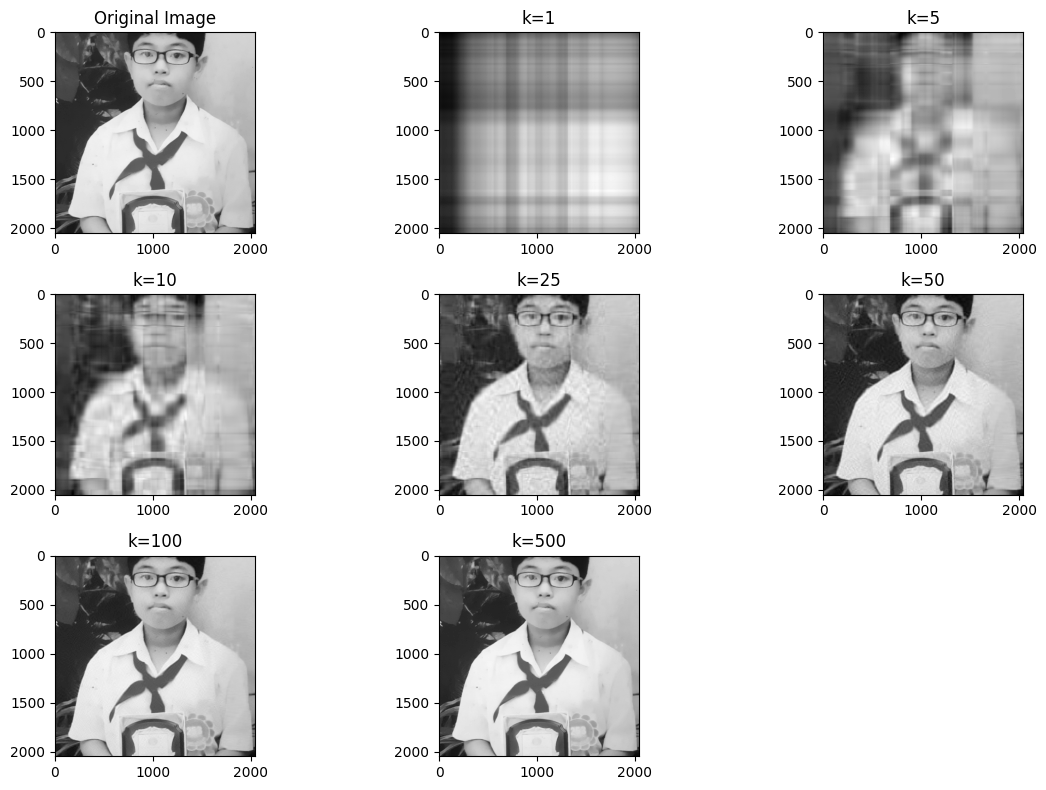

In [ ]:
# Task 1: Create a scalar-tensor on 'cuda' device with a value of 33 celsius degree
celsius_tensor = torch.tensor(33, dtype=torch.float32, device='cuda')

# Task 2: Write a function to convert it to Fahrenheit
def celsius_to_fahrenheit(celsius_tensor):
    fahrenheit = (celsius_tensor * (9/5)) + 32
    return fahrenheit

fahrenheit = celsius_to_fahrenheit(celsius_tensor)

# Task 3: Write a function to create a randomized matrix given dimension m, n
def random_matrix(m, n):
    return torch.rand(m, n, device='cuda')

# Task 4: Perform operations using 2 random matrices
m = 3
n = 2

# Create two random matrices
matrix1 = random_matrix(m, n)
matrix2 = random_matrix(n, m)

# Matrix - matrix multiplication
matrix_product = torch.mm(matrix1, matrix2)

# Matrix - vector multiplication
vector = torch.rand(n, device='cuda')  # Corrected the length of the vector to match the number of columns in matrix1
matrix_vector_product = torch.mv(matrix1, vector)

# Calculate norm
matrix_norm = torch.norm(matrix1)

# Calculate determinant (assuming m == n for simplicity)
if m == n:
    matrix_determinant = torch.det(matrix1)
else:
    matrix_determinant = None

print("Celsius Tensor:", celsius_tensor)
print("Fahrenheit Value:", fahrenheit)
print("Matrix 1:", matrix1)
print("Matrix 2:", matrix2)
print("Matrix - Matrix Multiplication:", matrix_product)
print("Matrix - Vector Multiplication:", matrix_vector_product)
print("Matrix Norm:", matrix_norm)
print("Matrix Determinant:", matrix_determinant)

# 5
# Load the uploaded image using OpenCV
image = cv2.imread('anh nghi.jpg', cv2.IMREAD_GRAYSCALE)

# Perform SVD
U, S, Vt = np.linalg.svd(image, full_matrices=False)

# Values of k to use
k_values = [1, 5, 10, 25, 50, 100, 500]

# Reconstruct the image using different values of k
reconstructed_images = []
for k in k_values:
    reconstructed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    reconstructed_images.append(reconstructed_image)

# Plot the original and reconstructed images
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

for i, k in enumerate(k_values):
    plt.subplot(3, 3, i + 2)
    plt.title(f'k={k}')
    plt.imshow(reconstructed_images[i], cmap='gray')

plt.tight_layout()
plt.show()


## Part 2: Calculus
Using torch to do the following
1. Given function $y = 3x^2 - 4x$, write a function to calculate the exact derivate
2. Write a function to approximate the derivate by finite difference $∇f ≈ \frac{f(x + ϵ) - f(x-ϵ)}{2ϵ}$
3. Use autograd functionality of torch/tensorflow to find the gradient when $x$ is a vector of $[0,1,2,3,4]$
4. Given function $f(x_1,x_2) = x_1^2 + 2x_2^2$, write a function to calculate the exact gradient
5. Use autograd to find approximate gradient
6. Plot the contour map of $f$ and $∇f$



tensor([-4.,  2.,  8., 14., 20.])
tensor(6.) tensor(16.)


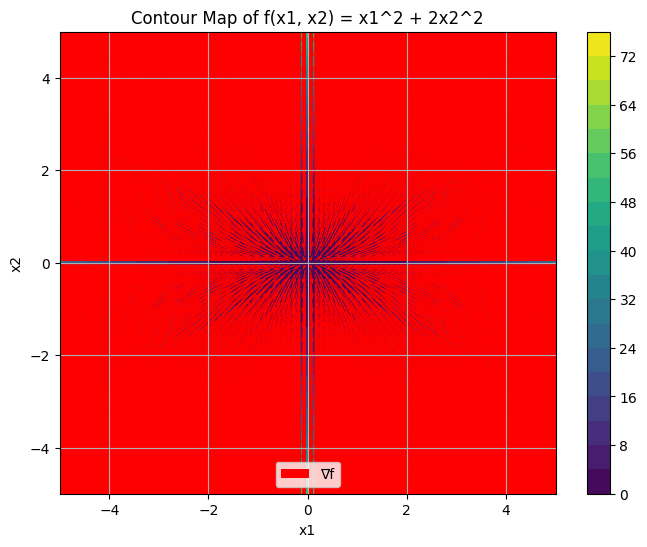

In [ ]:
# 1
def f(x):
    return 3*x**2 - 4*x

def f_deriv(x):
    return 6*x - 4
# 2
def finite_diff(f, x, eps=1e-6):
    return (f(x+eps)-f(x-eps)) / (2*eps)

# 3
x = torch.tensor([0., 1., 2., 3., 4.], requires_grad=True)
y = 3*x**2 - 4*x
y_sum = torch.sum(y)
y_sum.backward()
print(x.grad)

# 4
def exact_gradient(x1, x2):
  g1 = 2*x1
  g2 = 4*x2

  return g1, g2

g1, g2 = grad_f(torch.tensor(X), torch.tensor(Y))
grad_Z = [g1.detach().numpy(), g2.detach().numpy()]

# 5
x1 = torch.tensor(3., requires_grad=True)
x2 = torch.tensor(4., requires_grad=True)
y = x1**2 + 2*x2**2
y.backward()
print(x1.grad, x2.grad)

# 6
x1 = torch.linspace(-5, 5, 100)
x2 = torch.linspace(-5, 5, 100)
x1_grid, x2_grid = torch.meshgrid(x1, x2)

f_values = x1_grid**2 + 2*x2_grid**2
gradient_x1, gradient_x2 = exact_gradient(x1_grid, x2_grid)

plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, f_values, levels=20, cmap='viridis')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Map of f(x1, x2) = x1^2 + 2x2^2')
plt.grid(True)
plt.quiver(x1_grid, x2_grid, gradient_x1, gradient_x2, scale=20, color='red', label='∇f')
plt.legend()
plt.show()

### Part 3: Probability
Using torch to do the following
1. Write a function to generate a sequence of tossing a coin with probability $p$ and number of tosses $n$
2. Write a function that given a sequence of 8 tosses (ex, HHHHTTTT) generate the Maximum likelihood function and estimator
3. Write a function to calculate expectation value and variance based on $p$
4. Create a plot of the changing estimated probabilities in heads given a fair coin $p = 0.5$ for n from 1 -> 10000

Generated Sequence: tensor([0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=torch.int32)
Maximum Likelihood Estimator: tensor(0.3000)
Expectation Value: 0.3
Variance: 0.21


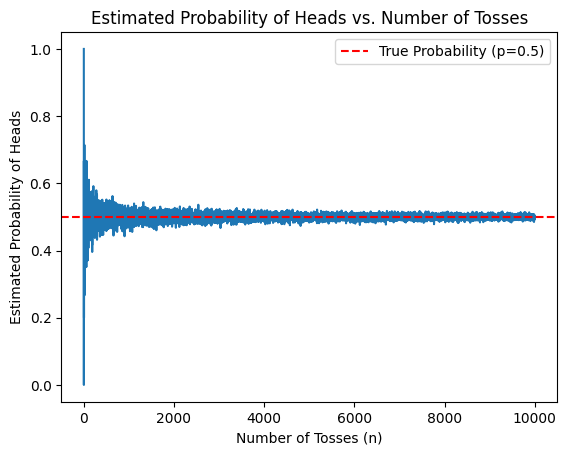

In [ ]:

# Function to generate a sequence of coin tosses
def generate_coin_toss_sequence(p, n):
    return torch.distributions.Bernoulli(p).sample((n,)).int()

# Function to generate Maximum Likelihood Function and Estimator
def max_likelihood_estimator(sequence):
    num_heads = sequence.sum()
    p_estimate = num_heads / len(sequence)
    return p_estimate

# Function to calculate expectation value and variance based on p
def expectation_value_and_variance(p):
    expectation = p
    variance = p * (1 - p)
    return expectation, variance

# Function to create a plot of changing estimated probabilities for a fair coin (p=0.5) from n=1 to n=10000
def plot_estimated_probabilities(p=0.5, max_n=10000):
    estimated_probs = []

    for n in range(1, max_n + 1):
        sequence = generate_coin_toss_sequence(p, n)
        p_estimate = max_likelihood_estimator(sequence)
        estimated_probs.append(p_estimate)

    plt.plot(range(1, max_n + 1), estimated_probs)
    plt.axhline(y=p, color='r', linestyle='--', label='True Probability (p=0.5)')
    plt.xlabel('Number of Tosses (n)')
    plt.ylabel('Estimated Probability of Heads')
    plt.legend()
    plt.title('Estimated Probability of Heads vs. Number of Tosses')
    plt.show()

# Generate a sequence of coin tosses with p=0.3 and n=10
p = 0.3
n = 10
sequence = generate_coin_toss_sequence(p, n)
print("Generated Sequence:", sequence)

# Calculate Maximum Likelihood Estimator for the sequence
p_estimate = max_likelihood_estimator(sequence)
print("Maximum Likelihood Estimator:", p_estimate)

# Calculate expectation value and variance for p=0.3
expectation, variance = expectation_value_and_variance(p)
print("Expectation Value:", expectation)
print("Variance:", variance)

# Create a plot of changing estimated probabilities for a fair coin (p=0.5) for n from 1 to 10000
plot_estimated_probabilities(p=0.5, max_n=10000)

## Part 4: Statistics

Using a torch and several libraries to do the following
1. Generate a sequence of tossing a coin with $p = 0.5, n = 10000$.
2. Randomly pick 100 samples from this vector and save them mean in a vector.
3. Explain its distribution.
4. Using Monte Carlo to estimate $\pi$ number, with $n = 10^2, 10^4,$ and $10^6$. (code from scratch, using numpy or pytorch).

<ipython-input-5-46d37a1af2f5>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_mean = torch.tensor(sample).float().mean().item()


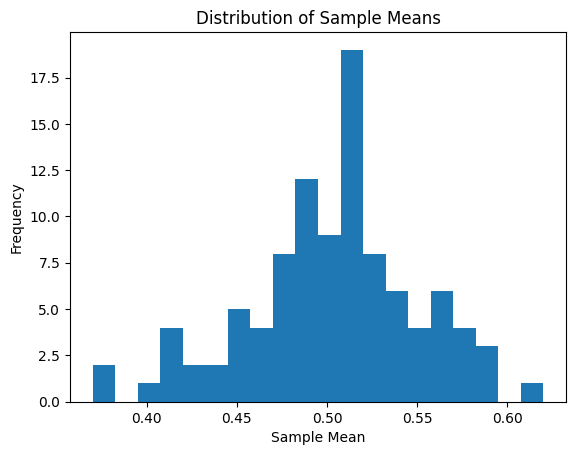

Monte Carlo Estimate of π for n=100: 3.36
Monte Carlo Estimate of π for n=10000: 3.1388
Monte Carlo Estimate of π for n=1000000: 3.140928


In [ ]:
# Task 1: Generate a sequence of coin tosses with p=0.5 and n=10000
def generate_coin_toss_sequence(p=0.5, n=10000):
    return torch.distributions.Bernoulli(p).sample((n,)).int()

# Task 2: Function to randomly pick 100 samples from the sequence and save their mean in a vector
def calculate_sample_means(sequence, num_samples=100):
    sample_means = []
    for _ in range(num_samples):
        sample = sequence[np.random.choice(len(sequence), size=100, replace=False)]
        sample_mean = torch.tensor(sample).float().mean().item()
        sample_means.append(sample_mean)
    return sample_means

# Generate a sequence of coin tosses with p=0.5 and n=10000
sequence = generate_coin_toss_sequence(p=0.5, n=10000)

# Calculate the sample means for 100 random samples
sample_means = calculate_sample_means(sequence, num_samples=100)

# Plot the distribution of sample means
plt.hist(sample_means, bins=20)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.show()

# Task 3: Using Monte Carlo to estimate π number
def monte_carlo_pi_estimate(num_samples):
    x = np.random.rand(num_samples)
    y = np.random.rand(num_samples)
    distance = np.sqrt(x**2 + y**2)
    num_points_inside_circle = np.sum(distance < 1)
    pi_estimate = 4 * (num_points_inside_circle / num_samples)
    return pi_estimate

# Estimating π using Monte Carlo with n = 10^2, 10^4, 10^6
n_values = [10**2, 10**4, 10**6]

for n in n_values:
    pi_estimate = monte_carlo_pi_estimate(n)
    print(f"Monte Carlo Estimate of π for n={n}: {pi_estimate}")


## Part 5: Supervised learning

**Linear regression**
*   Dataset: house price from boston
*   Objective: implement both numerical + analytical solutions
*   PLot and check for convergence
*   You should use Pytorch to done this question


1.   Analytical solution: $\beta = (X^TX)^{-1}X^T y$
2.   Numerical solution:

      *   Loss function (MSE): $\mathcal{L} (y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N (y-\hat{y})^2$
      *   Update rule: $\beta_{t+1} = \beta_t - \gamma \nabla \mathcal{L} (\beta_t)$
      *   Momentum: $\Delta \beta_{t+1} = -\gamma \nabla \mathcal{L}(\beta_{t+1}) + \alpha\Delta \beta_{t}$
      *   Update rule for momentum:  $\beta_{t+1} = \beta_t + \Delta \beta_{t}$


*  Visualize loss convergent
*  Plot linear regression line
*  Comparison:
    -  Time
    -  MSE
    -  Matching parameter vectors $\beta$


In [ ]:
# Run this cell to load data
from sklearn.datasets import fetch_openml
import pandas as pd
boston = fetch_openml(data_id=42165, as_frame=True)
X = boston.data
y = boston.target

df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
numerical_columns = df.select_dtypes(include=[float, int]).columns
X = df[numerical_columns]
beta = np.random.randn(X.shape[1]+1, 1)
beta[:-1].shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Fill your code here
# REQUIREMENTS: a function to calculate the gradient , a function to calculate the loss function, a function to excecute gradient descent
class LinearRegression:

   def cost_function(self, X, y, w, b):
        N = X.shape[0]
        y_pred = np.dot(X, w) + b
        y = y.reshape(-1, 1)
        cost = np.sqrt(np.sum((y_pred - y)**2) / (2 * N))
        return cost

    def gradient(self, X, y, w, b):
        N = X.shape[0]
        y = y.reshape(-1, 1)
        y_pred = np.dot(X, w) + b
        dw = np.dot(X.T, (y_pred - y)) / N
        db = np.sum(y_pred - y) / N
        return dw, db

    def fit(self, X, y, tau=0.01, gamma=0.05):
        loss = []
        beta = np.random.randn(X.shape[1] + 1, 1)
        N = len(X)
        y = y.reshape(-1, 1)

        epoch = 0

        while True:
            epoch += 1
            cost_before = self.cost_function(X, y, beta[:-1], beta[-1])

            dw, db = self.gradient(X, y, beta[:-1], beta[-1])
            beta[:-1] -= gamma * dw
            beta[-1] -= gamma * db

            cost_after = self.cost_function(X, y, beta[:-1], beta[-1])

            cost_diff = np.abs(cost_before - cost_after)

            loss.append(cost_after)

            if epoch % 100 == 0:
                print(f"Epoch [{epoch}] - Cost: {cost_after:.4f}")

            if cost_diff <= tau:
                break

        self.beta = beta
        self.loss = loss

    def predict(self, X):
        return np.dot(X, self.beta[:-1]) + self.beta[-1]

    def fit_momentum(self, X, y, tau=0.01, gamma=1e-9, alpha=5e-7):
        loss = []
        beta = np.random.randn(X.shape[1] + 1, 1) / 100
        N = len(X)
        y = y.reshape(-1, 1)
        v_dw = np.zeros((X.shape[1], 1))
        v_db = 0

        epoch = 0

        while True:
            cost_before = self.cost_function(X, y, beta[:-1], beta[-1])

            dw, db = self.gradient(X, y, beta[:-1], beta[-1])
            v_dw = alpha * v_dw + gamma * dw
            v_db = alpha * v_db + gamma * db
            beta[:-1] -= v_dw
            beta[-1] -= v_db

            cost_after = self.cost_function(X, y, beta[:-1], beta[-1])

            if cost_after == np.nan:
                print(f"Epoch [{epoch}] - Cost: {cost_before:.4f}")
                break
            cost_diff = np.abs(cost_before - cost_after)
            loss.append(cost_after)

            if epoch % 100 == 0:
                print(f"Epoch [{epoch}] - Cost: {cost_after:.4f}")
            epoch += 1

            if cost_diff <= tau:
                break

        self.beta = beta
        self.loss = loss

**Logistic Regression**
*   Dataset: breast cancer dataset
*   Objective: implement both numerical solution
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn
*   Loss function (Maximum Likelihood Estimator): $\mathcal{L} (y,\hat{y}) = -\frac{1}{N}\sum_{i=1}^N \left[y_i\cdot\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right]$
*   Logistic function : $\sigma(t) = \frac{1}{1+e^{-t}}$
      

In [ ]:
# Run this cell to load data
from sklearn import datasets
X,y = datasets.load_breast_cancer(return_X_y = True)

In [ ]:
class LogisticRegression:

      def cost_function(self, X, y, w, b):
        N = X.shape[0]
        y_pred = np.dot(X, w) + b
        y = y.reshape(-1, 1)
        cost = np.sqrt(np.sum((y_pred - y)**2) / (2 * N))
        return cost

    def gradient(self, X, y, w, b):
        N = X.shape[0]
        y = y.reshape(-1, 1)
        y_pred = np.dot(X, w) + b
        dw = np.dot(X.T, (y_pred - y)) / N
        db = np.sum(y_pred - y) / N
        return dw, db

    def fit(self, X, y, tau=0.01, gamma=0.05):
        loss = []
        beta = np.random.randn(X.shape[1] + 1, 1)
        N = len(X)
        y = y.reshape(-1, 1)

        epoch = 0

        while True:
            epoch += 1
            cost_before = self.cost_function(X, y, beta[:-1], beta[-1])

            dw, db = self.gradient(X, y, beta[:-1], beta[-1])
            beta[:-1] -= gamma * dw
            beta[-1] -= gamma * db

            cost_after = self.cost_function(X, y, beta[:-1], beta[-1])

            cost_diff = np.abs(cost_before - cost_after)

            loss.append(cost_after)

            if epoch % 100 == 0:
                print(f"Epoch [{epoch}] - Cost: {cost_after:.4f}")

            if cost_diff <= tau:
                break

        self.beta = beta
        self.loss = loss

    def predict(self, X):
        return np.dot(X, self.beta[:-1]) + self.beta[-1]

    def fit_momentum(self, X, y, tau=0.01, gamma=1e-9, alpha=5e-7):
        loss = []
        beta = np.random.randn(X.shape[1] + 1, 1) / 100
        N = len(X)
        y = y.reshape(-1, 1)
        v_dw = np.zeros((X.shape[1], 1))
        v_db = 0

        epoch = 0

        while True:
            cost_before = self.cost_function(X, y, beta[:-1], beta[-1])

            dw, db = self.gradient(X, y, beta[:-1], beta[-1])
            v_dw = alpha * v_dw + gamma * dw
            v_db = alpha * v_db + gamma * db
            beta[:-1] -= v_dw
            beta[-1] -= v_db

            cost_after = self.cost_function(X, y, beta[:-1], beta[-1])

            if cost_after == np.nan:
                print(f"Epoch [{epoch}] - Cost: {cost_before:.4f}")
                break
            cost_diff = np.abs(cost_before - cost_after)
            loss.append(cost_after)

            if epoch % 100 == 0:
                print(f"Epoch [{epoch}] - Cost: {cost_after:.4f}")
            epoch += 1

            if cost_diff <= tau:
                break

        self.beta = beta
        self.loss = loss

IndentationError: ignored

## Part 6: Unsupervised Learning
**PCA**
1. Implement PCA using SVD.


In [ ]:
# Write your code here

**K-means**
- Perform K-means clustering on the data below.
- How should we choose $k$ value?
- Visualization results.

In [ ]:
# Write your code here
import numpy as np
KMeansData = np.random.normal(size = (10000,2 ))

## Part 7: Neural network
- Implement the network below with Pytorch:
![](https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/nn_full-2.png?resize\u003d578%2C377\u0026ssl\u003d1)

In [ ]:
class NeuralNetwork():
  def __init__(self):
    pass
  def forward(self):
    pass
  def backward(self):
    pass
  def optim(self):
    pass
  def fit(self):
    pass
  def predict(self):
    pass